In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib widget

In [4]:
seed = 1
testsize = "0.33"
datapath = "/Users/kassand/astro/PlanetMigration_ML/training_data/"

ylabel = "flag"

df_test = pd.read_pickle(datapath + "test_data_seed_" + str(seed) + "_testsize_0.33.pkl")

print(df_test[ylabel].value_counts())

modpath = "/Users/kassand/astro/PlanetMigration_ML/tuned_models/model_exploration/"
fname = modpath + "RF_standardscaler_smote_seed_1_testsize_0.33_cv_nsplits_5.pkl"

with open(fname, 'rb') as file:
    best_model = pickle.load(file)

feature_names = list(best_model.feature_names_in_)
X_test, y_test = df_test[feature_names], df_test[ylabel]
y_test_pred = best_model.predict(X_test)

df_test["Imut_input_deg"] = df_test["Imut_input"].values*180/np.pi
df_test["a2eff_over_a1_input"] = df_test["a2eff_input"]/df_test["a1_input"].values
df_test["y_predict"] = y_test_pred

0    2912
2     220
1     147
Name: flag, dtype: int64


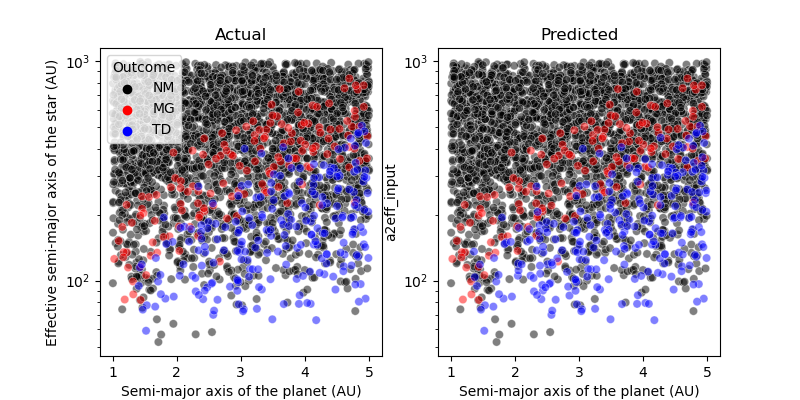

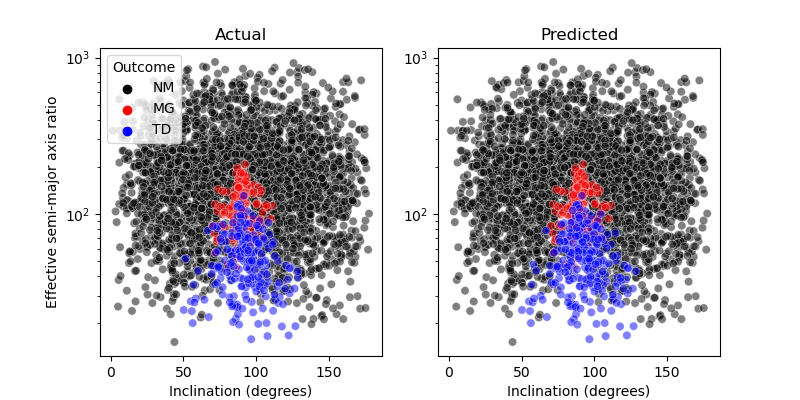

In [3]:
import matplotlib.lines as mlines
from IPython.display import display, clear_output
clear_output()

cpalette = ['k','r','b']
alpha = 0.5

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
splot1 = sns.scatterplot(data=df_test.sort_values("flag"), x="Imut_input_deg", y="a2eff_over_a1_input", hue='flag', palette = cpalette, alpha = alpha)
splot1.set(yscale = "log", xlabel = "Inclination (degrees)", ylabel = "Effective semi-major axis ratio", title = "Actual")
legend_labels, _= splot1.get_legend_handles_labels()
splot1.legend(legend_labels, ['NM','MG','TD'], title='Outcome')
sns.move_legend(splot1, "upper left")

plt.subplot(1,2,2)
splot2 = sns.scatterplot(data=df_test.sort_values("y_predict"), x="Imut_input_deg", y="a2eff_over_a1_input", hue='y_predict', palette = cpalette, alpha = alpha, legend = False)
splot2.set(yscale = "log", xlabel = "Inclination (degrees)", ylabel = "",title = "Predicted")
plt.savefig("../images/predicted_vs_actual_inclination.png")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
splot1 = sns.scatterplot(data=df_test.sort_values("flag"), x='a1_input', y='a2eff_input', hue='flag', palette = cpalette, alpha = alpha)
splot1.set(xlabel = "Semi-major axis of the planet (AU)",ylabel = "Effective semi-major axis of the star (AU)",yscale = "log",title = "Actual")
legend_labels, _= splot1.get_legend_handles_labels()
splot1.legend(legend_labels, ['NM','MG','TD'], title='Outcome')
sns.move_legend(splot1, "upper left")
plt.subplot(1,2,2)
splot2 = sns.scatterplot(data=df_test.sort_values("y_predict"), x='a1_input', y='a2eff_input', hue='y_predict', palette = cpalette, alpha = alpha, legend = False)
splot2.set(xlabel = "Semi-major axis of the planet (AU)",yscale = "log",title = "Predicted")
plt.savefig("../images/predicted_vs_actual_semimajoraxis.png")

plt.show()

In [8]:
df_test_MG = df_test[df_test["flag"] == 1]
df_test_TD = df_test[df_test["flag"] == 2]
df_test_NM = df_test[df_test["flag"] == 0]

N_tot = len(df_test.index.values)
N_TD = len(df_test_TD.index.values)
N_MG = len(df_test_MG.index.values)
N_NM = len(df_test_NM.index.values)

df_mis = df_test[df_test["flag"] - df_test["y_predict"] != 0]
df_mis_MG = df_mis[df_mis["flag"] == 1]
df_mis_TD = df_mis[df_mis["flag"] == 2]
df_mis_NM = df_mis[df_mis["flag"] == 0]

N_mis_tot = len(df_mis.index.values)
N_mis_TD = len(df_mis_TD.index.values)
N_mis_MG = len(df_mis_MG.index.values)
N_mis_NM = len(df_mis_NM.index.values)

print("Number of total misclassified systems: \n",N_mis_tot,)
print("Number of TD misclassified systems: \n",len(df_mis_TD.index.values))
print("Number of MG misclassified systems: \n",len(df_mis_MG.index.values))
print("Number of NM misclassified systems: \n",len(df_mis_NM.index.values))

print("Misclassification fraction (total): ", N_mis_tot/N_tot)
print("Misclassification fraction (MG): ", N_mis_MG/N_MG)
print("Misclassification fraction (TD): ", N_mis_TD/N_TD)
print("Misclassification fraction (NM): ", N_mis_NM/N_NM)

Number of total misclassified systems: 
 47
Number of TD misclassified systems: 
 7
Number of MG misclassified systems: 
 0
Number of NM misclassified systems: 
 40
Misclassification fraction (total):  0.014333638304361086
Misclassification fraction (MG):  0.0
Misclassification fraction (TD):  0.031818181818181815
Misclassification fraction (NM):  0.013736263736263736
